##A. IMPORT DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cnn = pd.read_csv('/content/drive/MyDrive/Final Project - Henry Halim Oktakusuma/CNN_Articels.csv')

In [ ]:
cnn.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,2,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,4,"Paul R. La Monica, CNN Business",2022-03-15 09:57:36,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."
4,7,Reuters,2022-03-15 11:27:02,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,The European Union formally approved on Tuesda...


##B. DATA CLEANING

In [ ]:
cnn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            4076 non-null   int64 
 1   Author           4076 non-null   object
 2   Date published   4076 non-null   object
 3   Category         4076 non-null   object
 4   Section          4076 non-null   object
 5   Url              4076 non-null   object
 6   Headline         4076 non-null   object
 7   Description      4076 non-null   object
 8   Keywords         4076 non-null   object
 9   Second headline  4076 non-null   object
 10  Article text     4076 non-null   object
dtypes: int64(1), object(10)
memory usage: 350.4+ KB


In [ ]:
cnn.duplicated().sum()

0

In [ ]:
cnn.isnull().sum()

Index              0
Author             0
Date published     0
Category           0
Section            0
Url                0
Headline           0
Description        0
Keywords           0
Second headline    0
Article text       0
dtype: int64

Tidak ada data yang null dan duplicated pada dataset

##C. DATA TRANSFORMATION

In [ ]:
#fitur yang digunakan category, description, & date published
cnn_news = cnn.drop(columns=['Index', 'Author', 'Section', 'Url', 'Headline', 'Keywords', 'Second headline', 'Article text'])

In [ ]:
cnn_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date published  4076 non-null   object
 1   Category        4076 non-null   object
 2   Description     4076 non-null   object
dtypes: object(3)
memory usage: 95.7+ KB


In [ ]:
#date publishe dari datetime ditransform menjadi month
from datetime import datetime

cnn_news['Date published'] = pd.to_datetime(cnn_news['Date published'])
cnn_news['Month published'] = cnn_news['Date published'].dt.strftime('%B')
cnn_news['Year published'] = cnn_news['Date published'].dt.strftime('%Y')
cnn_news = cnn_news.drop('Date published', axis=1)

cnn_news.head()

,Category,Description,Month published,Year published
0,news,The e-commerce boom has exacerbated a global t...,July,2021
1,news,Working in a factory can mean doing the same t...,May,2021
2,news,"In a Hong Kong warehouse, a swarm of autonomou...",June,2021
3,business,"For many years, the world's most popular emerg...",March,2022
4,business,The European Union formally approved on Tuesda...,March,2022


In [ ]:
cnn_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         4076 non-null   object
 1   Description      4076 non-null   object
 2   Month published  4076 non-null   object
 3   Year published   4076 non-null   object
dtypes: object(4)
memory usage: 127.5+ KB


##D. TEXT PROCESSING

In [ ]:
pip install num2words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=fe3826ba3b11182d0ebadf50cbcd72ee2c827d362ac7853965a5ebc202850e5a
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import re
import num2words
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def clean_text(text):
  #lowercase (mengubah semua huruf menjadi huruf kecil)
  text_clean = text.lower()
  #conver number to words
  text_clean = ' '.join([num2words.num2words(i) if i.isdigit() else i for i in text_clean.split()])
  #menghapus special character dan number
  text_clean = re.sub(r'[^a-z]', ' ', text_clean)
  #menghapus stop words
  stop_words = set(nltk.corpus.stopwords.words("english"))
  text_clean = ' '.join([word for word in text_clean.split() if word not in stop_words])
  #mengelompokan kata yang bermakna sama
  wordnet_lemmatizer = WordNetLemmatizer()
  lemmatized_list = []
  text_words = text_clean.split(" ")
  for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))

  text_clean = " ".join(lemmatized_list)
  #steming kata
  stemmer = PorterStemmer()
  stemmer.stem(text_clean)

  return text_clean

In [ ]:
for index in cnn_news.index:
  text_description = cnn_news.loc[index,'Description']
  cnn_news.loc[index,'Description'] = clean_text(text_description)

In [ ]:
cnn_news.head()

,Category,Description,Month published,Year published
0,news,e commerce boom exacerbate global truck driver...,July,2021
1,news,work factory mean task could lead chronic inju...,May,2021
2,news,hong kong warehouse swarm autonomous robots wo...,June,2021
3,business,many years world popular emerge market call br...,March,2022
4,business,european union formally approve tuesday new ba...,March,2022


In [ ]:
#Tokenizer
def tokenization(text):
    text = re.split('\W+', text)
    return text
cnn_news['Token Text'] = cnn_news['Description'].apply(lambda x: tokenization(x.lower()))

cnn_news.head()

,Category,Description,Month published,Year published,Token Text
0,news,e commerce boom exacerbate global truck driver...,July,2021,"[e, commerce, boom, exacerbate, global, truck,..."
1,news,work factory mean task could lead chronic inju...,May,2021,"[work, factory, mean, task, could, lead, chron..."
2,news,hong kong warehouse swarm autonomous robots wo...,June,2021,"[hong, kong, warehouse, swarm, autonomous, rob..."
3,business,many years world popular emerge market call br...,March,2022,"[many, years, world, popular, emerge, market, ..."
4,business,european union formally approve tuesday new ba...,March,2022,"[european, union, formally, approve, tuesday, ..."


##E. EXPLORATORY DATA ANALYSIS

In [ ]:
cnn_news['Year published'] = cnn_news['Year published'].astype('int64')

In [ ]:
cnn_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category         4076 non-null   object
 1   Description      4076 non-null   object
 2   Month published  4076 non-null   object
 3   Year published   4076 non-null   int64 
 4   Token Text       4076 non-null   object
dtypes: int64(1), object(4)
memory usage: 159.3+ KB


In [ ]:
cnn_news['Category'].value_counts()

sport            2176
news             1611
business          104
politics           75
entertainment      58
health             52
Name: Category, dtype: int64

In [ ]:
cnn_category_grouped = cnn_news.groupby('Category', as_index = False).size()
cnn_category_grouped

,Category,size
0,business,104
1,entertainment,58
2,health,52
3,news,1611
4,politics,75
5,sport,2176


In [ ]:
cnn_category_sorted = cnn_category_grouped.sort_values(['size'], ascending = False)
cnn_category_sorted

,Category,size
5,sport,2176
3,news,1611
0,business,104
4,politics,75
1,entertainment,58
2,health,52


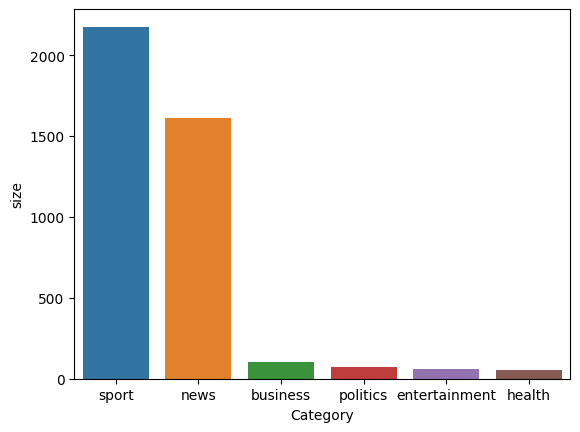

In [ ]:
sns.barplot(x=cnn_category_sorted['Category'],
            y=cnn_category_sorted['size'])
plt.show()

3 Category teratas berita yang paling banyak:
- Sport
- News
- Business

In [ ]:
cnn_news['Year published'].value_counts()

2021    3400
2022     299
2018      97
2020      75
2015      68
2016      34
2013      34
2017      29
2019      28
2014       6
2012       6
Name: Year published, dtype: int64

In [ ]:
cnn_year_grouped = cnn_news.groupby('Year published', as_index = False).size()
cnn_year_grouped

,Year published,size
0,2012,6
1,2013,34
2,2014,6
3,2015,68
4,2016,34
5,2017,29
6,2018,97
7,2019,28
8,2020,75
9,2021,3400


In [ ]:
cnn_year_sorted = cnn_year_grouped.sort_values(['size'], ascending = False)
cnn_year_sorted

,Year published,size
9,2021,3400
10,2022,299
6,2018,97
8,2020,75
3,2015,68
1,2013,34
4,2016,34
5,2017,29
7,2019,28
0,2012,6


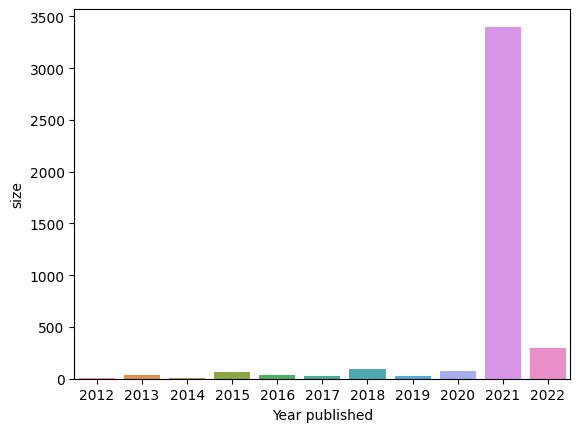

In [ ]:
sns.barplot(x=cnn_year_sorted['Year published'],
            y=cnn_year_sorted['size'])
plt.show()

3 Year Published berita terbanyak yang paling banyak:
- 2021
- 2022
- 2018

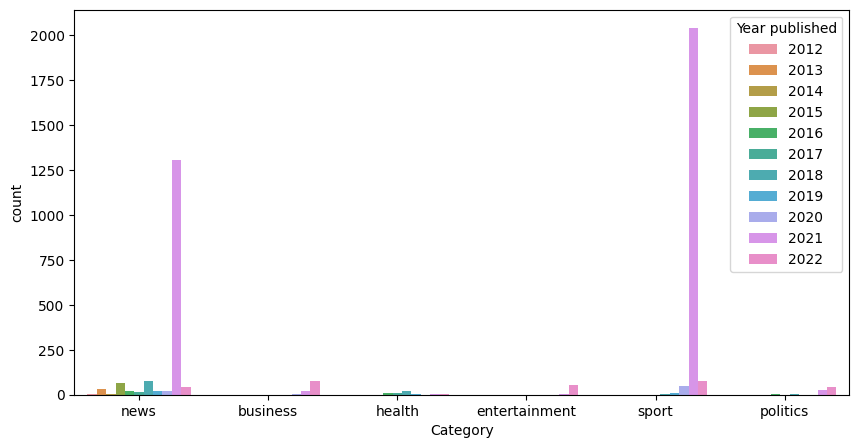

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=cnn_news,
            x='Category',
            hue='Year published'
            )
plt.show()

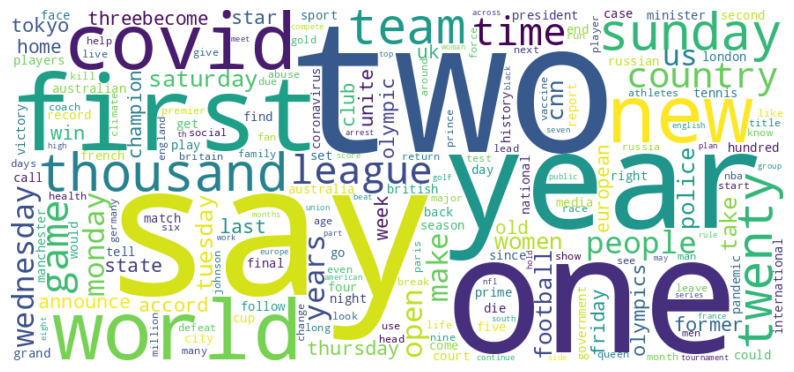

In [ ]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from nltk.probability import FreqDist

all_words = ' '.join(cnn_news['Description'])
freq_dist = FreqDist(all_words.split())

wordcloud = WordCloud(width=880, height=400, max_words=200, background_color='white').generate_from_frequencies(freq_dist)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##F. MODELING

Labeling Category

sport            2176
news             1611
business          104
politics           75
entertainment      58
health             52

In [ ]:
label_category = {
    'sport':1,
    'news':2,
    'business':3,
    'politics':4,
    'entertainment':5,
    'health':6
}

In [ ]:
cnn_news['label_category'] = cnn_news['Category'].map(label_category)

In [ ]:
cnn_news.head()

,Category,Description,Month published,Year published,Token Text,label_category
0,news,e commerce boom exacerbate global truck driver...,July,2021,"[e, commerce, boom, exacerbate, global, truck,...",2
1,news,work factory mean task could lead chronic inju...,May,2021,"[work, factory, mean, task, could, lead, chron...",2
2,news,hong kong warehouse swarm autonomous robots wo...,June,2021,"[hong, kong, warehouse, swarm, autonomous, rob...",2
3,business,many years world popular emerge market call br...,March,2022,"[many, years, world, popular, emerge, market, ...",3
4,business,european union formally approve tuesday new ba...,March,2022,"[european, union, formally, approve, tuesday, ...",3


In [ ]:
from sklearn.model_selection import train_test_split

X = cnn_news['Description'].to_numpy()
y = cnn_news['label_category'].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

Logistic Regression Model

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred_reg = logreg.predict(X_test_tfidf)
y_pred_reg

array([2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,

In [ ]:
print(classification_report(y_test, y_pred_reg, digits=6))

              precision    recall  f1-score   support

           1   0.921659  0.941176  0.931315       425
           2   0.774869  0.945687  0.851799       313
           3   0.000000  0.000000  0.000000        30
           4   0.000000  0.000000  0.000000        23
           5   0.000000  0.000000  0.000000        15
           6   0.000000  0.000000  0.000000        10

    accuracy                       0.852941       816
   macro avg   0.282755  0.314477  0.297186       816
weighted avg   0.777254  0.852941  0.811792       816



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Akurasi',accuracy_score(y_test, y_pred_reg))

Akurasi 0.8529411764705882


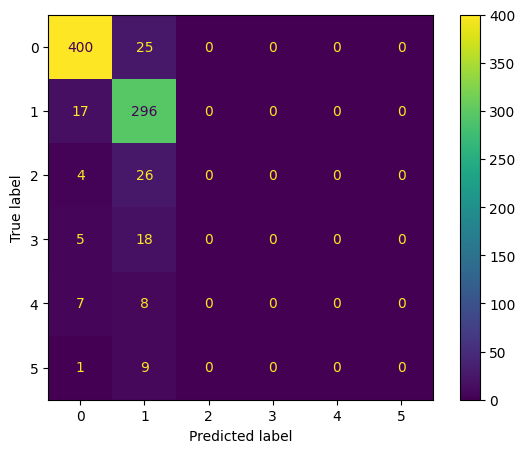

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

cm = confusion_matrix(y_test, y_pred_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

Decision Tree Model

In [ ]:
dectree = DecisionTreeClassifier(random_state=42)
dectree.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dectree.predict(X_test_tfidf)
y_pred_dt

array([2, 1, 1, 2, 2, 3, 1, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 3, 1, 2, 1, 3, 6, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 3, 1, 1, 2, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 3, 1, 1, 2, 4, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 4, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 5,
       1, 1, 1, 1, 3, 2, 1, 3, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 6, 2, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 6, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 2,
       2, 3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 4, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       3, 1, 1, 3, 3, 2, 2, 1, 1, 1, 1, 1, 2, 3, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 1, 3, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1,

In [ ]:
print(classification_report(y_test, y_pred_dt, digits=6))

              precision    recall  f1-score   support

           1   0.842105  0.865882  0.853828       425
           2   0.760797  0.731629  0.745928       313
           3   0.156863  0.266667  0.197531        30
           4   0.416667  0.217391  0.285714        23
           5   0.285714  0.133333  0.181818        15
           6   0.000000  0.000000  0.000000        10

    accuracy                       0.750000       816
   macro avg   0.410358  0.369151  0.377470       816
weighted avg   0.753185  0.750000  0.749482       816



In [ ]:
print('Akurasi',accuracy_score(y_test, y_pred_dt))

Akurasi 0.75


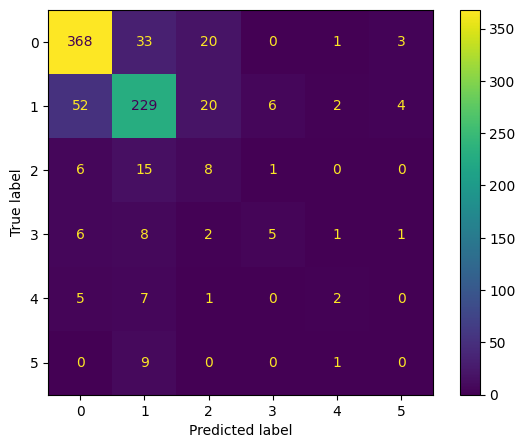

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

Random Forest Model

In [ ]:
ranfore = RandomForestClassifier(random_state=42)
ranfore.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_ranfore = ranfore.predict(X_test_tfidf)
y_pred_ranfore

array([1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 1, 3, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 3, 2, 1, 1,
       1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       1, 3, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       3, 2, 1, 1, 3, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 3, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1,

In [ ]:
print(classification_report(y_test, y_pred_ranfore, digits=6))

              precision    recall  f1-score   support

           1   0.887133  0.924706  0.905530       425
           2   0.785515  0.900958  0.839286       313
           3   0.230769  0.100000  0.139535        30
           4   1.000000  0.043478  0.083333        23
           5   0.000000  0.000000  0.000000        15
           6   0.000000  0.000000  0.000000        10

    accuracy                       0.832108       816
   macro avg   0.483903  0.328190  0.327947       816
weighted avg   0.800026  0.832108  0.801041       816



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Akurasi',accuracy_score(y_test, y_pred_ranfore))

Akurasi 0.8321078431372549


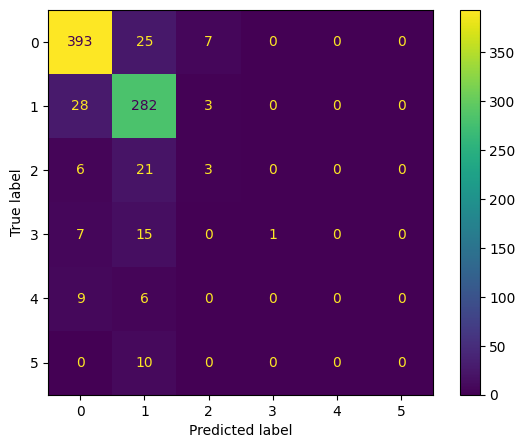

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

cm = confusion_matrix(y_test, y_pred_ranfore)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

#Evaluasi

Dari ketiga model yang digunakan dengan tingkat accuracy sebagai berikut:
1. Logistic Regresion accuracy 0.85
2. Decision Tree accuracy 0.75
3. Random Forest accuracy 0.83

##G. HYPERPARAMETER TUNING



Hyperparameter Tuning menggunakan GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

Hyperparameter Tuning Logistic Regresion Model

In [ ]:
parameters = {
    'C': (0.5,1.5,0.1),
    'max_iter': (100,500,1000)
}

logreg_gridcv = GridSearchCV(logreg, parameters, cv=5, scoring='accuracy')
logreg_gridcv.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': (0.5, 1.5, 0.1), 'max_iter': (100, 500, 1000)},
             scoring='accuracy')

In [ ]:
cv_result_logreg = pd.DataFrame(logreg_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result_logreg[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
3,"{'C': 1.5, 'max_iter': 100}",0.866564,1
4,"{'C': 1.5, 'max_iter': 500}",0.866564,1
5,"{'C': 1.5, 'max_iter': 1000}",0.866564,1
0,"{'C': 0.5, 'max_iter': 100}",0.865951,4
1,"{'C': 0.5, 'max_iter': 500}",0.865951,4
2,"{'C': 0.5, 'max_iter': 1000}",0.865951,4
6,"{'C': 0.1, 'max_iter': 100}",0.803067,7
7,"{'C': 0.1, 'max_iter': 500}",0.803067,7
8,"{'C': 0.1, 'max_iter': 1000}",0.803067,7


In [ ]:
logreg_tuning = LogisticRegression(C=1.5, max_iter=1000)
logreg_tuning.fit(X_train_tfidf, y_train)

LogisticRegression(C=1.5, max_iter=1000)

In [ ]:
y_pred_reg_tuning = logreg_tuning.predict(X_test_tfidf)

In [ ]:
print(classification_report(y_test, y_pred_reg_tuning, digits=6))

              precision    recall  f1-score   support

           1   0.919725  0.943529  0.931475       425
           2   0.781003  0.945687  0.855491       313
           3   1.000000  0.033333  0.064516        30
           4   0.000000  0.000000  0.000000        23
           5   0.000000  0.000000  0.000000        15
           6   0.000000  0.000000  0.000000        10

    accuracy                       0.855392       816
   macro avg   0.450121  0.320425  0.308580       816
weighted avg   0.815364  0.855392  0.815663       816



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Akurasi',accuracy_score(y_test, y_pred_reg_tuning))

Akurasi 0.8553921568627451


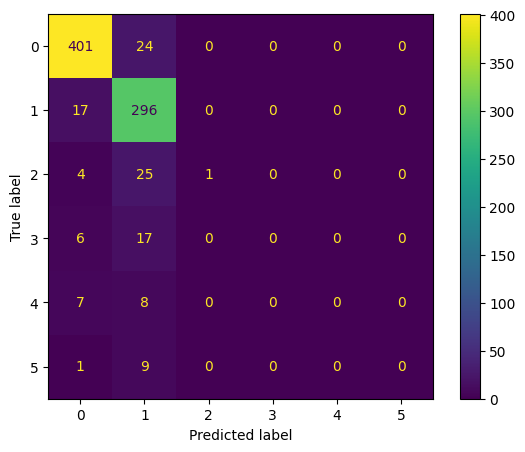

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

cm = confusion_matrix(y_test, y_pred_reg_tuning)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

Hyperparameter Tuning Decision Tree Model

In [ ]:
parameters_dectree = {
    'max_depth': (1,2,3,4,5,6,7,8,9,10)
}

dectree_gridcv = GridSearchCV(dectree, parameters_dectree, cv=5, scoring='accuracy')
dectree_gridcv.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)},
             scoring='accuracy')

In [ ]:
cv_result_dectree = pd.DataFrame(dectree_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result_dectree[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
9,{'max_depth': 10},0.657055,1
8,{'max_depth': 9},0.647546,2
7,{'max_depth': 8},0.640184,3
6,{'max_depth': 7},0.622086,4
5,{'max_depth': 6},0.603988,5
4,{'max_depth': 5},0.580675,6
3,{'max_depth': 4},0.554294,7
0,{'max_depth': 1},0.537117,8
1,{'max_depth': 2},0.537117,8
2,{'max_depth': 3},0.531288,10


In [ ]:
dectree_tuning = DecisionTreeClassifier(random_state=42, max_depth=10)
dectree_tuning.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred_dt_tuning = dectree_tuning.predict(X_test_tfidf)

In [ ]:
print(classification_report(y_test, y_pred_dt_tuning, digits=6))

              precision    recall  f1-score   support

           1   0.975904  0.571765  0.721068       425
           2   0.541446  0.980831  0.697727       313
           3   0.000000  0.000000  0.000000        30
           4   0.000000  0.000000  0.000000        23
           5   0.000000  0.000000  0.000000        15
           6   0.000000  0.000000  0.000000        10

    accuracy                       0.674020       816
   macro avg   0.252892  0.258766  0.236466       816
weighted avg   0.715970  0.674020  0.643190       816



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Akurasi',accuracy_score(y_test, y_pred_dt_tuning))

Akurasi 0.6740196078431373


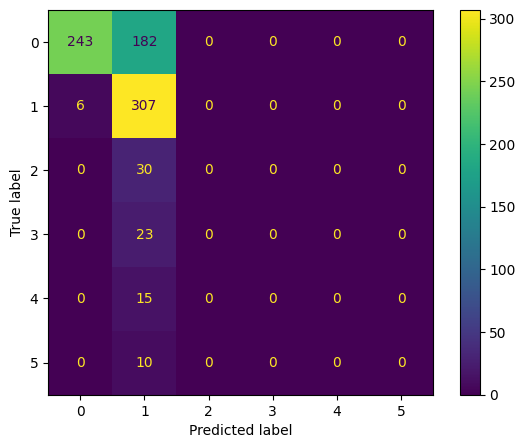

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

cm = confusion_matrix(y_test, y_pred_dt_tuning)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

Hyperparameter Tuning Random Forest Model

In [ ]:
parameters_ranfore = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

ranfore_gridcv = GridSearchCV(ranfore, parameters_ranfore, cv=5, scoring='accuracy')
ranfore_gridcv.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='accuracy')

In [ ]:
cv_result_ranfore = pd.DataFrame(ranfore_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result_ranfore[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
21,"{'max_depth': 5, 'n_estimators': 20}",0.607669,1
20,"{'max_depth': 5, 'n_estimators': 10}",0.605521,2
22,"{'max_depth': 5, 'n_estimators': 30}",0.601534,3
24,"{'max_depth': 5, 'n_estimators': 50}",0.600920,4
23,"{'max_depth': 5, 'n_estimators': 40}",0.600613,5
15,"{'max_depth': 4, 'n_estimators': 10}",0.590798,6
16,"{'max_depth': 4, 'n_estimators': 20}",0.585890,7
17,"{'max_depth': 4, 'n_estimators': 30}",0.581902,8
18,"{'max_depth': 4, 'n_estimators': 40}",0.580675,9
19,"{'max_depth': 4, 'n_estimators': 50}",0.576687,10


In [ ]:
ranfore_tuning = RandomForestClassifier(max_depth=5, n_estimators=20)
ranfore_tuning.fit(X_train_tfidf, y_train)

RandomForestClassifier(max_depth=5, n_estimators=20)

In [ ]:
y_pred_ranfore_tuning = ranfore_tuning.predict(X_test_tfidf)

In [ ]:
print(classification_report(y_test, y_pred_ranfore_tuning, digits=6))

              precision    recall  f1-score   support

           1   0.551634  0.992941  0.709244       425
           2   0.921569  0.150160  0.258242       313
           3   0.000000  0.000000  0.000000        30
           4   0.000000  0.000000  0.000000        23
           5   0.000000  0.000000  0.000000        15
           6   0.000000  0.000000  0.000000        10

    accuracy                       0.574755       816
   macro avg   0.245534  0.190517  0.161248       816
weighted avg   0.640803  0.574755  0.468454       816



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Akurasi',accuracy_score(y_test, y_pred_ranfore_tuning))

Akurasi 0.5747549019607843


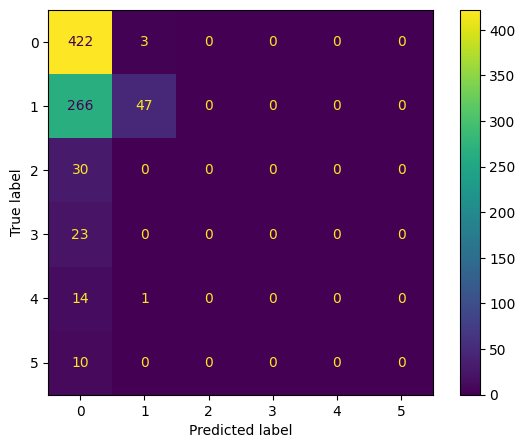

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

cm = confusion_matrix(y_test, y_pred_ranfore_tuning)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

#Evaluasi

Accuracy model baseline:
1. Logistic Regresion accuracy 0.852
2. Decision Tree accuracy 0.750
3. Random Forest accuracy 0.832

Accuracy model setelah hyperparameter tuning:
1. Logistic Regresion accuracy 0.855
2. Decision Tree accuracy 0.674
3. Random Forest accuracy 0.574

#F. KESIMPULAN

Model Logistic Regresion menjadi model yang cocok digunakan untuk klasifikasi news category dari dataset CNN News, karena Logistic Regresion lebih stabil nilai accuracy dan adanya kenaikan accuracy setelah dilakukan hyperparameter tuning.